In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dist_s1_enumerator import (get_mgrs_tiles_overlapping_geometry, 
                                get_burst_table_from_mgrs_tiles, 
                                get_lut_by_mgrs_tile_ids, 
                                get_mgrs_burst_lut_path)
from dist_s1_enumerator.dist_enum import enumerate_dist_s1_products
from shapely.geometry import Point
from datetime import datetime, timedelta
import geopandas as gpd
from rasterio.crs import CRS
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
from pathlib import Path

# Provide AOI

In [3]:
# Wax Lake Delta
point = Point(-91.45,29.5)
df_aoi = gpd.GeoDataFrame(geometry=[point], crs=CRS.from_epsg(4326))

# Get Overlapping Tiles

Can be point or polygon.

In [4]:
df_mgrs_tiles = get_mgrs_tiles_overlapping_geometry(point)

## Visualize Overlapping Tiles and AOI

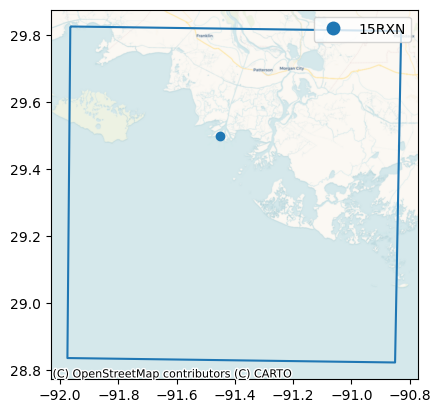

In [5]:
fig, ax = plt.subplots()
df_mgrs_tiles_plot = df_mgrs_tiles.copy()
df_mgrs_tiles_plot.geometry = df_mgrs_tiles_plot.geometry.boundary
df_mgrs_tiles_plot.plot(column='mgrs_tile_id', categorical=True, legend=True, ax=ax)
df_aoi.plot(ax=ax)
ctx.add_basemap(ax,
                crs=df_mgrs_tiles.crs.to_string(),
                source=ctx.providers.CartoDB.Voyager
                )

# Visualize Overlapping Passes

In [6]:
MGRS_TILE = '15RXN'

In [7]:
df_mgrs_burst_luts = get_lut_by_mgrs_tile_ids([MGRS_TILE])
df_mgrs_burst_luts.head()

,mgrs_tile_id,jpl_burst_id,orbit_pass,track_number,acq_group_id_within_mgrs_tile,area_per_acq_group_km2,n_bursts_per_acq_group
0,15RXN,T063-133337-IW3,ASCENDING,63,0,15838,16
1,15RXN,T063-133338-IW2,ASCENDING,63,0,15838,16
2,15RXN,T063-133338-IW3,ASCENDING,63,0,15838,16
3,15RXN,T063-133339-IW2,ASCENDING,63,0,15838,16
4,15RXN,T063-133339-IW3,ASCENDING,63,0,15838,16


In [8]:
df_bursts = get_burst_table_from_mgrs_tiles([MGRS_TILE])
df_bursts.head()

,jpl_burst_id,geometry,track_number,acq_group_id_within_mgrs_tile,mgrs_tile_id
0,T063-133337-IW3,"POLYGON ((-91.1627 28.57844, -90.35433 28.6981...",63,0,15RXN
1,T063-133338-IW2,"POLYGON ((-92.07298 28.55011, -91.15958 28.692...",63,0,15RXN
2,T063-133338-IW3,"POLYGON ((-91.19651 28.74463, -90.38697 28.864...",63,0,15RXN
3,T063-133339-IW2,"POLYGON ((-92.10828 28.71639, -91.19336 28.858...",63,0,15RXN
4,T063-133339-IW3,"POLYGON ((-91.23035 28.91082, -90.41946 29.030...",63,0,15RXN


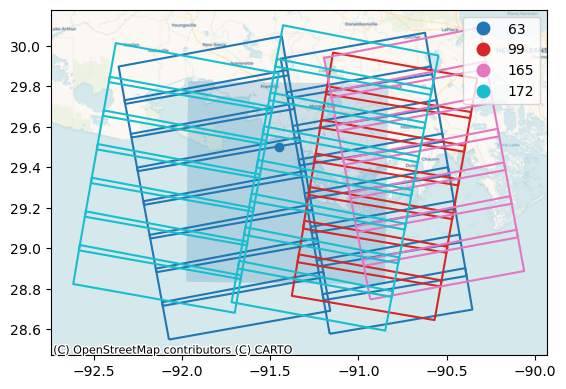

In [9]:
fig, ax = plt.subplots()
df_mgrs_tiles_plot = df_mgrs_tiles.copy()
df_mgrs_tiles_plot.plot(column='mgrs_tile_id', categorical=True, ax=ax, alpha=.2)
df_aoi.plot(ax=ax)
df_bursts_plot = df_bursts.copy()
df_bursts_plot.geometry = df_bursts_plot.geometry.boundary
df_bursts_plot.plot(column='track_number', categorical=True, ax=ax, legend=True)
ctx.add_basemap(ax,
                crs=df_mgrs_tiles.crs.to_string(),
                source=ctx.providers.CartoDB.Voyager
                )

# Get the RTC Metadata for the Time-Series

I specify a track, but that is optional.

In [10]:
from dist_s1_enumerator.asf import get_rtc_s1_ts_metadata_from_mgrs_tiles

In [12]:
df_ts = get_rtc_s1_ts_metadata_from_mgrs_tiles([MGRS_TILE], track_numbers=[63])
df_ts.head(5)

,opera_id,jpl_burst_id,acq_dt,polarization,url_vh,url_vv,track_number,geometry
0,OPERA_L2_RTC-S1_T063-133337-IW3_20231023T00103...,T063-133337-IW3,2023-10-23 00:10:34+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,63,"POLYGON ((-91.17121 28.57624, -91.12729 28.583..."
1,OPERA_L2_RTC-S1_T063-133337-IW3_20231104T00103...,T063-133337-IW3,2023-11-04 00:10:34+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,63,"POLYGON ((-91.17045 28.57665, -90.32624 28.706..."
2,OPERA_L2_RTC-S1_T063-133337-IW3_20231116T00103...,T063-133337-IW3,2023-11-16 00:10:34+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,63,"POLYGON ((-91.17099 28.5778, -90.32681 28.7077..."
3,OPERA_L2_RTC-S1_T063-133337-IW3_20231128T00103...,T063-133337-IW3,2023-11-28 00:10:33+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,63,"POLYGON ((-91.16941 28.5775, -90.32523 28.7074..."
4,OPERA_L2_RTC-S1_T063-133337-IW3_20231210T00103...,T063-133337-IW3,2023-12-10 00:10:33+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,63,"POLYGON ((-91.17056 28.57662, -90.32647 28.706..."


# Enumerate DIST-S1 Products

In [18]:
df_products = enumerate_dist_s1_products(df_ts, [MGRS_TILE])
df_products.head()

Enumerating by MGRS tiles: 100%|█████████████████| 1/1 [00:00<00:00,  5.14it/s]


,opera_id,jpl_burst_id,acq_dt,polarization,url_vh,url_vv,track_number,geometry,pass_id,input_category,product_id,mgrs_tile_id,acq_group_id_within_mgrs_tile
0,OPERA_L2_RTC-S1_T063-133339-IW3_20240806T00103...,T063-133339-IW3,2024-08-06 00:10:34+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,63,"POLYGON ((-91.2363 28.90885, -90.38932 29.0385...",68,pre,0,15RXN,0
1,OPERA_L2_RTC-S1_T063-133340-IW2_20240806T00103...,T063-133340-IW2,2024-08-06 00:10:36+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,63,"POLYGON ((-92.15015 28.87545, -91.18923 29.028...",68,pre,0,15RXN,0
2,OPERA_L2_RTC-S1_T063-133340-IW3_20240806T00103...,T063-133340-IW3,2024-08-06 00:10:37+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,63,"POLYGON ((-91.27032 29.0758, -90.42201 29.2053...",68,pre,0,15RXN,0
3,OPERA_L2_RTC-S1_T063-133341-IW2_20240806T00103...,T063-133341-IW2,2024-08-06 00:10:39+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,63,"POLYGON ((-92.18555 29.04187, -91.22302 29.194...",68,pre,0,15RXN,0
4,OPERA_L2_RTC-S1_T063-133341-IW3_20240806T00104...,T063-133341-IW3,2024-08-06 00:10:40+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,63,"POLYGON ((-91.30418 29.24188, -90.45444 29.371...",68,pre,0,15RXN,0


In [19]:
len(df_products.product_id.unique())

65

In [20]:
PRODUCT_ID = 10

PROD_IND = (df_products.product_id == PRODUCT_ID)
PRE_IND = (df_products.input_category == 'pre')
POST_IND = (df_products.input_category == 'post')

print(f'The number of RTC products for product id {PRODUCT_ID} are {df_products[PROD_IND].shape[0]} products')
print(f'The number of pre-image RTC products for product id {PRODUCT_ID} are {df_products[PROD_IND & PRE_IND].shape[0]} products')
print(f'The number of post-image RTC products for product id {PRODUCT_ID} are {df_products[PROD_IND & POST_IND].shape[0]} products')

The number of RTC products for product id 10 are 143 products
The number of pre-image RTC products for product id 10 are 130 products
The number of post-image RTC products for product id 10 are 13 products


In [22]:
df_products[PROD_IND].head()

,opera_id,jpl_burst_id,acq_dt,polarization,url_vh,url_vv,track_number,geometry,pass_id,input_category,product_id,mgrs_tile_id,acq_group_id_within_mgrs_tile
880,OPERA_L2_RTC-S1_T063-133339-IW2_20240607T00103...,T063-133339-IW2,2024-06-07 00:10:35+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,63,"POLYGON ((-92.11317 28.70964, -91.17448 28.859...",58,pre,10,15RXN,0
881,OPERA_L2_RTC-S1_T063-133339-IW3_20240607T00103...,T063-133339-IW3,2024-06-07 00:10:36+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,63,"POLYGON ((-91.23494 28.91042, -90.40491 29.037...",58,pre,10,15RXN,0
882,OPERA_L2_RTC-S1_T063-133340-IW2_20240607T00103...,T063-133340-IW2,2024-06-07 00:10:38+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,63,"POLYGON ((-92.14851 28.87594, -91.20825 29.025...",58,pre,10,15RXN,0
883,OPERA_L2_RTC-S1_T063-133340-IW3_20240607T00103...,T063-133340-IW3,2024-06-07 00:10:39+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,63,"POLYGON ((-91.26878 29.0765, -90.43735 29.2034...",58,pre,10,15RXN,0
884,OPERA_L2_RTC-S1_T063-133341-IW2_20240607T00104...,T063-133341-IW2,2024-06-07 00:10:41+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,63,"POLYGON ((-92.18391 29.04236, -91.24207 29.192...",58,pre,10,15RXN,0


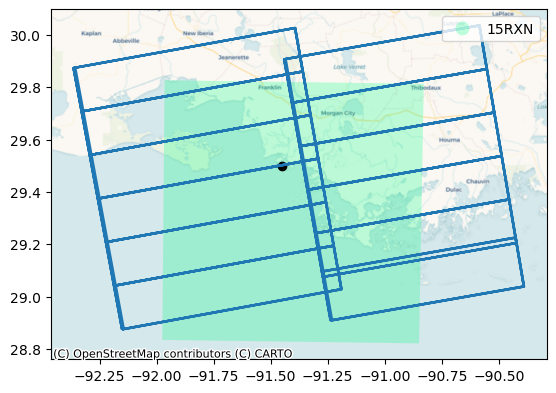

In [21]:
fig, ax = plt.subplots()

df_mgrs_tiles_plot.plot(column='mgrs_tile_id', categorical=True, legend=True, ax=ax, alpha=.25, cmap='winter_r')
df_aoi.plot(ax=ax, color='black')
df_products[df_products.product_id == 0].boundary.plot(ax=ax)
ctx.add_basemap(ax,
                crs=df_mgrs_tiles.crs.to_string(),
                source=ctx.providers.CartoDB.Voyager
                )